<h1>Lab 02 - Background</h1>

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


One way to check the relationship between two variables is to calculate the covariance. We can take variables x and y and plug them into this equation

Covariance(x,y) = sum((x - mean(x)) * (y - mean(y)) * 1/(n-1)) or the numpy method cov()

If the returned value is zero, it would indidcate that both variables are independant of eachother. 

<h3>Genertaing 2D Flat Distribution</h3>

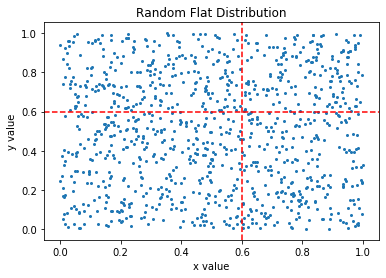

In [200]:
#Generating random data
def createData(num):
    x = np.random.random(num)
    y = np.random.random(num)
    return x,y

#Creating the Scatter plot with axis
xInt = 0.6
yInt = 0.6
test = createData(num = 1000)
plt.scatter(test[0],test[1],s = 4)
plt.title('Random Flat Distribution')
plt.xlabel('x value')
plt.ylabel('y value')
plt.axhline(yInt, c = 'r', linestyle = 'dashed')
plt.axvline(xInt, c = 'r', linestyle = 'dashed')

In [201]:
#Counts how many plots are in the A region
def countPoints(x,y,xInt,yInt):
    count = 0
    for i in range(0, len(x)):
        if x[i] > yInt:
            if y[i] > xInt:
                count += 1
    return count    

print(countPoints(test[0], test[1],xInt,yInt))

167


Expected points located in region A should be 0.4 x 0.4 = 0.16 or 16% of the data points since this is a flat distribution. So we should expect to see 160 points in the region. The actual amount of plot located in region A is 167.

<h3>Creating a Data Set for Points in Region A</h3>

Text(0.5, 1.0, 'Distribution of Total Events in Region A')

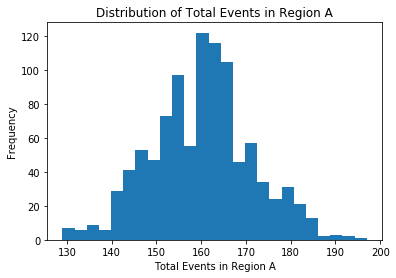

In [202]:
#Creating a Data Set
scatterDataSet = []
for i in range(1000):
    temp = createData(num = 1000)
    scatterDataSet.append(countPoints(temp[0], temp[1],xInt,yInt))

plt.hist(scatterDataSet, bins = 25)
plt.xlabel('Total Events in Region A')
plt.ylabel('Frequency')
plt.title('Distribution of Total Events in Region A')

This appears to be a Gaussian distribution because since the distribution is suppose to be a flat distribution, we can accurately predict the expected value of points lying in a specific region. Since this is a consistant test, we should expect the count to land near the expected values. 

<h3>Vary Size of the Statistics</h3>

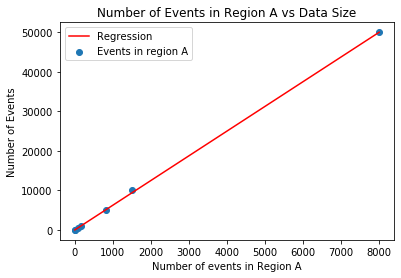

In [203]:
#Creates the Data for varying sizes of events
y = [10, 100, 500, 1000, 5000, 10000, 50000]
xActual = []
xPredict = []
for count in y:
    tempX, tempY = createData(num = count)
    xActual.append(countPoints(tempX, tempY,xInt,yInt))
    xPredict.append(count * 0.16)
    
#I Could not figure out how to use linear regression method here
reg = linear_model.LinearRegression()

#Plot the regression line and data points
plt.scatter(xActual, y, label = 'Events in region A')    
plt.plot(xPredict, y, color='red', label = 'Regression')
plt.xlabel("Number of events in Region A")
plt.ylabel('Number of Events')
plt.title('Number of Events in Region A vs Data Size')
plt.legend()

I know that the prediction error is basically the distance from the data points to a point on the best fit line of our data. I would need to find the root mean squared value and the coefficents of the linear regression line in form mx + b and ft that to the scatter plot. 

<h3>Varying X split in ABCD Method</h3>

Text(0.5, 1.0, 'X Split Relationship with Region A')

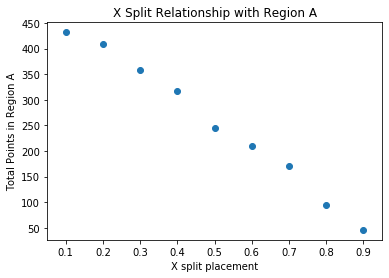

In [254]:
#Varies the x split values and records the events in region A
yInt = 0.1
xInt = 0.5
varyAxis = []
xInterval = []
for i in range(9):
    xInterval.append(yInt * (i+1))
    temp = createData(1000)
    varyAxis.append(countPoints(temp[0],temp[1],xInt,xInterval[i]))
    i += 1

#Plots the data set
plt.scatter(xInterval, varyAxis)
plt.xlabel('X split placement')
plt.ylabel('Total Points in Region A')
plt.title('X Split Relationship with Region A')

This makes sense because as x increases, the number of events located in region A should decreases linearly.

<h3>Random Log Functions</h3>

Events in region A = 2


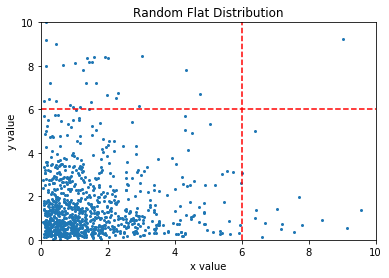

In [250]:
#Makes random log events 
x = np.random.lognormal(mean = 0.1, size = 1000)
y = np.random.lognormal(mean = 0.1, size = 1000)
xInt = 6
yInt = 6

#Plots the data
plt.scatter(x,y,s = 4)
plt.title('Random Flat Distribution')
plt.xlabel('x value')
plt.ylabel('y value')
plt.xlim(0,10)
plt.ylim(0,10)
plt.axhline(yInt, c = 'r', linestyle = 'dashed')
plt.axvline(xInt, c = 'r', linestyle = 'dashed')
print('Events in region A =', countPoints(x,y,xInt,yInt))

I compared two log functions against eachother expecting to the least amount of points in region A. As expected, this was comfirmed where log functions output greater values at lower value numbers and numbers closer to 0 as the input increases.

<h3>Random Gaussian Distribution</h3>

Total events in region A = 256


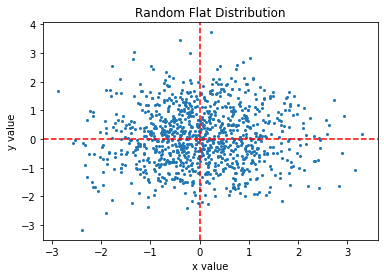

In [253]:
#Makes random gaussian events
x = np.random.normal(size = 1000)
y = np.random.normal(size = 1000)
xInt = 0
yInt = 0

#Plots the scatter plot
plt.scatter(x,y,s = 4)
plt.title('Random Flat Distribution')
plt.xlabel('x value')
plt.ylabel('y value')
plt.axhline(yInt, c = 'r', linestyle = 'dashed')
plt.axvline(xInt, c = 'r', linestyle = 'dashed')
print('Total events in region A =', countPoints(x,y,xInt,yInt))

Similarly, when comparing two gaussian distributions, we expect that the center of the data set would be the most dense area. We can see that relationship in the data since many of the events gravitate towards the average of the distribution which in this case is 0. If I were create a x and y split both at 0, I would expect an even distribution in all 4 quadrants. In this case, 25% of 1000 events is 250 events which is very close to the 256 events we obtained.